### **<span style="color:#FCF16D">0. Importation des librairies</span>**

In [2]:
# lecture du notebook
%matplotlib inline
import warnings
warnings.filterwarnings('ignore','int', category=DeprecationWarning)

# typographie 
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

# librairies
import json, requests, emoji, regex, re, string
from collections import Counter
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# visualisation
import chart_studio
import chart_studio.plotly as py 
import chart_studio.tools as tls
import matplotlib.pyplot as plt 
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

# traitement du language
import gensim as gs
from gensim.corpora import Dictionary
from gensim.models.ldamulticore import LdaMulticore
from gensim.models.coherencemodel import CoherenceModel
from gensim.parsing.preprocessing import STOPWORDS as SW
from pprint import pprint
import pyLDAvis.gensim
import snscrape.modules.twitter as sntwitter
import spacy as scy
from spacy.tokenizer import Tokenizer
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from wordcloud import STOPWORDS
from nltk.corpus import stopwords
stopwords = set(stopwords.words('french'))

### **<span style="color:#FCF16D">1. Récupération des données</span>**

#### **<span style="color:#8EA3EB">1.1. Scrapping tweet généraux</span>**

In [126]:
# création de liste pour récupérer les tweets
tweets_like = []
tweets_base = []

# création d'une boucle for pour analyser les tweets
# paramètres (mots clef, date, langue etc)
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('#covid since:2021-01-01 until:2021-12-30 lang:fr').get_items()):
    if i>1000000:
        break

    # définission du nombre de like
    elif tweet.likeCount > 200:
        tweets_like.append([tweet.date, tweet.id, tweet.content, tweet.user.username, tweet.likeCount, tweet.user.displayname, tweet.user.verified, tweet.lang])
    else :
        tweets_base.append([tweet.date, tweet.id, tweet.content, tweet.user.username, tweet.likeCount, tweet.user.displayname, tweet.user.verified, tweet.lang])

In [127]:
# création de la liste de colonne
cols_name = ['Datetime', 'Tweet Id', 'Text', 'Username', 'Like Count', 'Display Name', 'Vérifié', 'Language']

# création des DataFrame finaux
df_tweets_base = pd.DataFrame(tweets_base, columns=cols_name)
df_tweets_like = pd.DataFrame(tweets_like, columns=cols_name)

In [128]:
# enregistrement en csv du jeu de donnée final
df_tweets_base.to_csv('Tweets_scrapé_base.csv')
df_tweets_like.to_csv('Tweets_scrapé_like.csv')

#### **<span style="color:#8EA3EB">1.2. Scrapping tweet comptes vérifiés | influenceurs</span>**

In [130]:
# création de liste pour récupérer les tweets de personne ou entreprise vérifiées
tweets_influence = []

# création d'une boucle for pour scraper uniquement les tweets souhaités
# initialisation du compteur
j = 0
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('#covid since:2021-01-01 until:2021-12-30 lang:fr').get_items()):
    if j>1000000:
        break
    # condition pour récupérer uniquement les tweets de compte influents
    elif tweet.user.verified == True:
        tweets_influence.append([tweet.date, tweet.id, tweet.content, tweet.user.username, tweet.likeCount, tweet.user.displayname, tweet.user.verified, tweet.lang])
        j = j + 1

In [131]:
# création du DataFrame
df_tweets_influence = pd.DataFrame(tweets_influence, columns=cols_name)

In [132]:
# enregistrement en csv du jeu de donnée final
df_tweets_influence.to_csv('Tweets_scrapé_influence.csv')

#### **<span style="color:#8EA3EB">1.3. Scrapping tweet Gouvernement français</span>**

In [2]:
tweets_gouv = []

# création d'une boucle for pour analyser les tweets du gouvernement
# paramètres (mots clef, date, langue etc)
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('covid from:gouvernementFR since:2021-01-01 until:2021-12-30 lang:fr').get_items()):
    if i>1000000:
        break
    # récupération des tweets 
    tweets_gouv.append([tweet.date, tweet.id, tweet.content, tweet.user.username, tweet.likeCount, tweet.user.displayname, tweet.user.verified, tweet.lang])

for i,tweet in enumerate(sntwitter.TwitterSearchScraper('covid from:olivierveran since:2021-01-01 until:2021-12-30 lang:fr').get_items()):
    if i>1000000:
        break
    # récupération des tweets 
    tweets_gouv.append([tweet.date, tweet.id, tweet.content, tweet.user.username, tweet.likeCount, tweet.user.displayname, tweet.user.verified, tweet.lang])

for i,tweet in enumerate(sntwitter.TwitterSearchScraper('covid from:JeanCASTEX since:2021-01-01 until:2021-12-30 lang:fr').get_items()):
    if i>1000000:
        break
    # récupération des tweets 
    tweets_gouv.append([tweet.date, tweet.id, tweet.content, tweet.user.username, tweet.likeCount, tweet.user.displayname, tweet.user.verified, tweet.lang])

for i,tweet in enumerate(sntwitter.TwitterSearchScraper('covid from:EmmanuelMacron since:2021-01-01 until:2021-12-30 lang:fr').get_items()):
    if i>1000000:
        break
    # récupération des tweets 
    tweets_gouv.append([tweet.date, tweet.id, tweet.content, tweet.user.username, tweet.likeCount, tweet.user.displayname, tweet.user.verified, tweet.lang])

for i,tweet in enumerate(sntwitter.TwitterSearchScraper('covid from:Sante_Gouv since:2021-01-01 until:2021-12-30 lang:fr').get_items()):
    if i>1000000:
        break
    # récupération des tweets 
    tweets_gouv.append([tweet.date, tweet.id, tweet.content, tweet.user.username, tweet.likeCount, tweet.user.displayname, tweet.user.verified, tweet.lang])

C:\Users\Bastien\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
# création du DataFrame
cols_name = ['Datetime', 'Tweet Id', 'Text', 'Username', 'Like Count', 'Display Name', 'Vérifié', 'Language']
df_tweets_gouv = pd.DataFrame(tweets_gouv, columns=cols_name)

C:\Users\Bastien\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
# enregistrement en csv du jeu de donnée final
df_tweets_gouv.to_csv('Tweets_scrapé_gouv.csv')

C:\Users\Bastien\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### **<span style="color:#8EA3EB">1.4. Compilation des données</span>**

In [136]:
# concaténation des dataframes
df_tweet = pd.concat([df_tweets_base, df_tweets_like, df_tweets_influence, df_tweets_gouv], axis=0, ignore_index=True)

In [137]:
# enregistrement en csv du jeu de donnée final
df_tweet.to_csv('Tweets_finaux.csv')

### **<span style="color:#FCF16D">2. Data cleaning</span>**

#### **<span style="color:#8EA3EB">2.1. Chargement des données scrapées</span>**

In [32]:
# pour travailler avec les données scrapper précédemment
df_tweet = pd.read_csv(r'Tweets_finaux.csv', header=0)
df_tweet = pd.DataFrame(df_tweet)
cols_sup = ['Unnamed: 0']
df_tweet = df_tweet.drop(columns=cols_sup)

C:\Users\Bastien\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### **<span style="color:#8EA3EB">2.2. Pipeline NLP</span>**

In [33]:
def nlp_pipeline(text):

    # remplacement des nom d'utilisateur
    text = re.sub(r'@\S+', '', text)

    # remplacement des syntaxe de base (minuscules, ponctuations, caractère spéciaux, chiffres)
    text = text.lower()
    text = text.replace('\n', ' ').replace('\r', '')
    text = ' '.join(text.split())
    text = re.sub(r"[A-Za-z\.]*[0-9]+[A-Za-z%°\.]*", "", text)
    text = re.sub(r"(\s\-\s|-$)", "", text)
    text = re.sub(r"[,\!\?\%\(\)\/\"]", "", text)
    text = re.sub(r"\&\S*\s", "", text)
    text = re.sub(r"\&", "", text)
    text = re.sub(r"\+", "", text)
    text = re.sub(r"\#", "", text)
    text = re.sub(r"\$", "", text)
    text = re.sub(r"\'", "", text)
    text = re.sub(r"\£", "", text)
    text = re.sub(r"\%", "", text)
    text = re.sub(r"\:", "", text)
    text = re.sub(r"\@", "", text)
    text = re.sub(r"\-", "", text)

    # suppression des emojis
    text = emoji.get_emoji_regexp().sub(r'', text)

    # remplacement des adresses internet et liens
    text = re.sub(r'http\S+', '', text)

    return text

C:\Users\Bastien\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [34]:
# application de la fonction
nettoyage_nlp = lambda x: nlp_pipeline(x)

# création d'une nouvelle colonne en appliquant le traitement de cleaning du texte
df_tweet['Texte_clean'] = df_tweet['Text'].apply(nettoyage_nlp)

C:\Users\Bastien\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### **<span style="color:#8EA3EB">2.3. Tokenisation</span>**

In [35]:
# après quelques recherches, j'ai du telecharger les référence spacy du language français
# je le charge ci-dessous pour pouvoir l'utiliser
nlp = scy.load('fr_core_news_lg')

C:\Users\Bastien\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [36]:
# tokenisation
tokenizer = Tokenizer(nlp.vocab)

# je rajoute les stopswords qui me semble cohérent (avec ma connaissance de la langue française)
custom_stopwords = ['bonjour','\n','\n\n', "l'",'&amp;', ' ','  ', '.', '-', 'salut','|', 'il','=','le','la','les','d', 'nous', "c'est", 'cest', "je", 'veux', "j'aime", '$', '@']

# j'ajoute mes stopword personnels à la liste définis par défault
STOP_WORDS = nlp.Defaults.stop_words.union(custom_stopwords)

# ALL_STOP_WORDS = spacy + gensim + ntlk | cette opération me permet d'avoir le maximum de STOPWORD pour le traitement de mes tweets
ALL_STOP_WORDS = STOP_WORDS.union(SW).union(stopwords)

C:\Users\Bastien\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [37]:
# initialisation de liste 
tokens = []

# iteration de la boucle sur le texte traité précédemment
for doc in tokenizer.pipe(df_tweet['Texte_clean']):
    doc_tokens = []
    # pour chaque ligne
    for token in doc: 
        # si ce n'est pas un STOPWORD
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())   
    tokens.append(doc_tokens)

# création de la colonne 'token'
df_tweet['tokens'] = tokens

# création de la colonne en string à partir des token (pour lemmatiser)
df_tweet['tokens_back_to_text'] = [' '.join(map(str, l)) for l in df_tweet['tokens']]

C:\Users\Bastien\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### **<span style="color:#8EA3EB">2.4. Lemmatisation</span>**

In [38]:
def get_lemmas(text):
    lemmas = []
    doc = nlp(text)
    
    # itération sur chaque mot présent en utilisant le package spacy sur le vocabulaire et la grammaire
    for token in doc: 
        # si ce n'est pas égal à de la ponctuation, stopword
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

# création de la nouvelle colonne lematiser en appliquant la fonction récemment créée
df_tweet['lemmas'] = df_tweet['tokens_back_to_text'].apply(get_lemmas)

C:\Users\Bastien\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [39]:
# repassage en string
df_tweet['lemmas'] = [' '.join(map(str, l)) for l in df_tweet['lemmas']]

C:\Users\Bastien\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [40]:
# on retokenise notre colonne lematiser pour regrouper à nouveau
text_lemmas = []

for doc in tokenizer.pipe(df_tweet['lemmas']):
    doc_lemma = []    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_lemma.append(token.text.lower())   
    text_lemmas.append(doc_lemma)

# création de la colonne du texte tokeniser et lematiser
df_tweet['lemma_token'] = text_lemmas

C:\Users\Bastien\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### **<span style="color:#8EA3EB">2.5. Enregistrement des données cleans</span>**

In [41]:
# enregistrement en csv du jeu de donnée final tokeniser et lemmaliser
df_tweet.to_csv('Tweets_finaux_token.csv')

C:\Users\Bastien\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### **<span style="color:#FCF16D">3. Modelisations</span>**

##### Informations supplémentaires

In [3]:
#df_tweet = pd.read_csv(r'Tweets_finaux_token.csv', header=0)
#df_tweet = pd.DataFrame(df_tweet)
#cols_sup = ['Unnamed: 0']
#df_tweet = df_tweet.drop(columns=cols_sup)

C:\Users\Bastien\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [42]:
# création d'une nouvelle colonne pour classer les familles de Tweets
df_tweet['Famille'] = ""

for i in range(len(df_tweet['Text'])):
    if df_tweet['Like Count'][i] > 200:
        df_tweet['Famille'][i] = "Liké +"
    elif df_tweet['Username'][i] == "gouvernementFR":
        df_tweet['Famille'][i] = "Gouvernement"
    elif df_tweet['Username'][i] == "olivierveran":
        df_tweet['Famille'][i] = "Gouvernement"
    elif df_tweet['Username'][i] == "JeanCASTEX":
        df_tweet['Famille'][i] = "Gouvernement"
    elif df_tweet['Username'][i] == "EmmanuelMacron":
        df_tweet['Famille'][i] = "Gouvernement"
    elif df_tweet['Username'][i] == "Sante_Gouv":
        df_tweet['Famille'][i] = "Gouvernement"
    elif df_tweet['Vérifié'][i] == True:
        df_tweet['Famille'][i] = "Certifié"
    else:
        df_tweet['Famille'][i] = "Base"

C:\Users\Bastien\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-42-8df6331207a2>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet['Famille'][i] = "Base"
<ipython-input-42-8df6331207a2>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet['Famille'][i] = "Certifié"
<ipython-input-42-8df6331207a2>:16

In [43]:
df_tweet['Datetime'] = pd.to_datetime(df_tweet['Datetime'])

df_tweet['Jour_tweet'] = ""

for i in range(len(df_tweet['Text'])):
    df_tweet['Jour_tweet'][i] = df_tweet['Datetime'][i].weekday()

C:\Users\Bastien\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-43-e1a42c324091>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet['Jour_tweet'][i] = df_tweet['Datetime'][i].weekday()


In [44]:
pd.crosstab(df_tweet.Jour_tweet,df_tweet['Famille'],margins=True).style.background_gradient(cmap='RdBu')

C:\Users\Bastien\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Famille,Base,Certifié,Gouvernement,Liké +,All
Jour_tweet,,,,,
0,27764,5774,21,456,34015
1,28836,6068,9,386,35299
2,30816,6736,13,396,37961
3,29868,6508,15,408,36799
4,29184,5798,9,395,35386
5,22911,3342,11,369,26633
6,21437,3036,11,343,24827
All,190816,37262,89,2753,230920


#### **<span style="color:#8EA3EB">3.1. LDA</span>**

##### **<span style="color:#6DEFA2">3.1.1. Réglages et configuration pré-LDA</span>**

In [45]:
# création du dictionnaire
id2word = Dictionary(df_tweet['lemma_token'])
print(len(id2word))

C:\Users\Bastien\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


132469


In [46]:
# filtre des extremes (je décide de mettre 300 dans 'no_below', qui correspond à un peu moins de 0.1% de mon jeu de donnée)
id2word.filter_extremes(no_below=300, no_above=0.99)
print(len(id2word))

C:\Users\Bastien\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1589


In [47]:
# création du corpus de référence
corpus = [id2word.doc2bow(d) for d in df_tweet['lemma_token']]

C:\Users\Bastien\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##### **<span style="color:#6DEFA2">3.1.2. LDA et paramétrage</span>**

In [49]:
# initialisation du model LDA (topic= 10 --> choisis après analyse de la perplexcité et de la cohérence)
base_model = LdaMulticore(corpus=corpus, num_topics=6, id2word=id2word, passes=5, random_state=69, alpha='symmetric')

C:\Users\Bastien\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [50]:
# filtre par mot
words = [re.findall(r'"([^"]*)"',t[1]) for t in base_model.print_topics()]

C:\Users\Bastien\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [51]:
# création des différents sujets
topics = [' '.join(t[0:10]) for t in words]

C:\Users\Bastien\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##### **<span style="color:#6DEFA2">3.1.3. Evaluation du modèle</span>**

In [66]:
# affichage de mes sujets
for id, t in enumerate(topics): 
    print(color.BOLD + color.DARKCYAN, f"Topic{id}:", color.END, t, end="\n")

 Topic0:  covid test ⁦ sanitaire crise mesure école travail positif fermer
 Topic1:  covid mettre patient santé malade hôpital situation jour place soignant
 Topic2:  covid macron crise confinement france français politique gouvernement sanitaire faire
 Topic3:  covid vaccin vaccination contre dose vacciner coronavirus france recevoir anticovid
 Topic4:  covid cas coronavirus france décès varier nombre mort jour semaine
 Topic5:  covid faire vacciner vaccin an non bien falloir virus risque


C:\Users\Bastien\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [53]:
# perplexcité (plus elle est faible, mieux est le modèle)
base_perplexity = round(base_model.log_perplexity(corpus),2)
print(color.BOLD + color.RED, 'Perplexcité: ', color.END, base_perplexity) 

# cohérence (plus elle est élevée, mieux elle le modèle)
coherence_model = CoherenceModel(model=base_model, texts=df_tweet['lemma_token'], dictionary=id2word, coherence='c_v')
coherence_lda_model_base = round(coherence_model.get_coherence(),2)
print(color.BOLD + color.GREEN, 'Cohérence: ', color.END, coherence_lda_model_base) 

C:\Users\Bastien\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


 Perplexcité:   -6.4
 Cohérence:   0.41


#### **<span style="color:#8EA3EB">3.2. Prédictions nouvelles valeurs</span>**

In [76]:
# 4 phrases à prédire
new_text = ['le confinement imposé par Macron et son gouvernement est une véritable atteinte aux libertés fondamentales',
            'A l’heure d’aujourd’hui, nous ne pouvons pas dire que le vaccins pfizer soit totalement efficace',
            'La France détient le record du nombre de cas de covid par jour',
            'HELP ! Je ne peux plus emmener mon enfant à l’école car il y a la queue dans les centres de dépistages',
            'Le covid est vraiment une maladie de merde: courage à nos soignants',
            'Le port du masque et la vaccination obligatoire pour entrer à l’hôpital ? Ce gouvernement est au top !']

# création du Df pour les phrases à prédire
df_pred = pd.DataFrame(new_text, columns=['Texte_prediction'])

C:\Users\Bastien\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [77]:
# cleaning du texte 
df_pred['Texte_clean'] = df_pred['Texte_prediction'].apply(nettoyage_nlp)

# initialisation de liste 
tokens1 = []

# iteration de la boucle sur le texte traité précédemment
for doc in tokenizer.pipe(df_pred['Texte_prediction']):
    doc_tokens = []
    # pour chaque ligne
    for token in doc: 
        # si ce n'est pas un STOPWORD
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())   
    tokens1.append(doc_tokens)

# création de la colonne 'token'
df_pred['tokens'] = tokens1

# création de la colonne en string à partir des token (pour lemmatiser)
df_pred['tokens_back_to_text'] = [' '.join(map(str, l)) for l in df_pred['tokens']]

# création de la nouvelle colonne lematiser en appliquant la fonction récemment créée
df_pred['lemmas'] = df_pred['tokens_back_to_text'].apply(get_lemmas)

# repassage en string
df_pred['lemmas'] = [' '.join(map(str, l)) for l in df_pred['lemmas']]

# on retokenise notre colonne lematiser pour regrouper à nouveau
text_lemmas1 = []

for doc in tokenizer.pipe(df_pred['lemmas']):
    doc_lemma = []    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_lemma.append(token.text.lower())   
    text_lemmas1.append(doc_lemma)

# création de la colonne du texte tokeniser et lematiser
df_pred['lemma_token'] = text_lemmas1

C:\Users\Bastien\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [78]:
# prédictions
base_model[id2word.doc2bow(df_pred['lemma_token'][5])]

C:\Users\Bastien\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0, 0.01897657),
 (1, 0.52742517),
 (2, 0.17907602),
 (3, 0.23739648),
 (4, 0.018531736),
 (5, 0.018594036)]

### **<span style="color:#FCF16D">4. Analyse et visualisation</span>**

#### **<span style="color:#8EA3EB">4.1 Visualisation interactive du modèle</span>**

##### **<span style="color:#6DEFA2">4.1.1. Visualisation LDA</span>**

In [56]:
#Creating Topic Distance Visualization 
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(base_model, corpus, id2word)

C:\Users\Bastien\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\Bastien\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.167975 -0.114335       1        1  21.848835
2     -0.110399 -0.145639       2        1  21.337091
0     -0.000432 -0.023930       3        1  16.801864
3     -0.088891  0.208918       4        1  15.741738
4      0.074588  0.177109       5        1  14.286138
1      0.293109 -0.102124       6        1   9.984334, topic_info=            Term          Freq         Total Category  logprob  loglift
38        vaccin  42404.000000  42404.000000  Default  30.0000  30.0000
71   vaccination  25804.000000  25804.000000  Default  29.0000  29.0000
23        contre  19992.000000  19992.000000  Default  28.0000  28.0000
119          cas  14560.000000  14560.000000  Default  27.0000  27.0000
100       mettre   8873.000000   8873.000000  Default  26.0000  26.0000
..           ...           ...           ...      ...      ...      ...
600        heure   1871.110067   4045.227555   Topic6  -4.6915   1.5331
217       public   1569.235292   3636.792027   Topic6  -4.8674   1.4636
428      médecin   1679.105623   4594.236048   Topic6  -4.7997   1.2976
82        france   1329.704701  18963.998290   Topic6  -5.0330  -0.3534
361         mort   1235.967542   7968.826444   Topic6  -5.1061   0.4405

[394 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
124       2  0.066895          
124       3  0.114677          
124       4  0.181349          
124       5  0.632945          
124       6  0.004445          
...     ...       ...       ...
289       5  0.998790   élément
552       2  0.999340  émission
673       2  0.175177  étudiant
673       3  0.824329  étudiant
1125      3  0.999787         ⁦

[739 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 3, 1, 4, 5, 2])

#### **<span style="color:#8EA3EB">4.2 Visualisation de l'évolution de la quantité de tweet</span>**

##### **<span style="color:#6DEFA2">4.2.1. Préparation de la viz</span>**

In [79]:
# je crée une copie de mon Df
tweet_ts = df_tweet.copy()

C:\Users\Bastien\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [80]:
# j'initialise des reglages pour une analyse de timeserie
tweet_ts['Datetime'] = pd.to_datetime(tweet_ts['Datetime'])
tweet_ts = pd.DataFrame(tweet_ts, index=tweet_ts.set_index('Datetime',inplace = True))

# je groupe mes tweets par semaine
tweet_ts_count = tweet_ts.groupby([pd.Grouper(freq='W')]).count()

C:\Users\Bastien\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##### **<span style="color:#6DEFA2">4.2.2. Visualisation</span>**

C:\Users\Bastien\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0, 0.5, 'Nombre tweet')

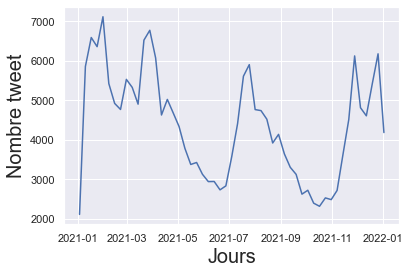

In [81]:
sns.set_theme(style="darkgrid")

# création d'un graphique du nombre de tweet par jour pour voir l'évolution
p = sns.lineplot(x="Datetime", y="Text", data=tweet_ts_count)
p.set_xlabel("Jours", fontsize = 20)
p.set_ylabel("Nombre tweet", fontsize = 20)

`` il semble avoir des variations sur la quantité de tweet selon la période``

Nous allons créer un graphique interactif, regroupant plusieurs groupe de Twittos ainsi que des annonces et moments importants de l'année 2021.

Nous etudierons si ces variations ont un lien avec les annonces

#### **<span style="color:#8EA3EB">4.3 Visualisation de l'évolution par groupe de Twittos</span>**

##### **<span style="color:#6DEFA2">4.3.1. Préparation de la viz</span>**

In [82]:
# création de Dataframe pour les listes que nous avons créées précédemment
cols_sup = ['Unnamed: 0']

df_tweets_base = pd.read_csv(r'Tweets_scrapé_base.csv', header=0)
df_tweets_base = pd.DataFrame(df_tweets_base)
df_tweets_base = df_tweets_base.drop(columns=cols_sup)

df_tweets_gouv = pd.read_csv(r'Tweets_scrapé_gouv.csv', header=0)
df_tweets_gouv = pd.DataFrame(df_tweets_gouv)
df_tweets_gouv = df_tweets_gouv.drop(columns=cols_sup)

df_tweets_influence = pd.read_csv(r'Tweets_scrapé_influence.csv', header=0)
df_tweets_influence = pd.DataFrame(df_tweets_influence)
df_tweets_influence = df_tweets_influence.drop(columns=cols_sup)

df_tweets_like = pd.read_csv(r'Tweets_scrapé_like.csv', header=0)
df_tweets_like = pd.DataFrame(df_tweets_like)
df_tweets_like = df_tweets_like.drop(columns=cols_sup)

C:\Users\Bastien\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [83]:
# création d'une copie de ces DataFrame pour l'utilisation dans le graphique
df_fig_base = df_tweets_base.copy()
df_fig_like = df_tweets_like.copy()
df_fig_influence = df_tweets_influence.copy()
df_fig_gouv = df_tweets_gouv.copy()

C:\Users\Bastien\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [84]:
# groupement par semaine et initialisation des reglages de timeseries

# TweetBase
df_fig_base['Datetime'] = pd.to_datetime(df_fig_base['Datetime'])
df_fig_base = pd.DataFrame(df_fig_base, index=df_fig_base.set_index('Datetime',inplace = True))
df_fig_base_ok = df_fig_base.groupby([pd.Grouper(freq='W')]).count()
# TweetGouv
df_fig_gouv['Datetime'] = pd.to_datetime(df_fig_gouv['Datetime'])
df_fig_gouv = pd.DataFrame(df_fig_gouv, index=df_fig_gouv.set_index('Datetime',inplace = True))
df_fig_gouv_ok = df_fig_gouv.groupby([pd.Grouper(freq='W')]).count()
# TweetBuzz
df_fig_like['Datetime'] = pd.to_datetime(df_fig_like['Datetime'])
df_fig_like = pd.DataFrame(df_fig_like, index=df_fig_like.set_index('Datetime',inplace = True))
df_fig_like_ok = df_fig_like.groupby([pd.Grouper(freq='W')]).count()
# TweetInfluence
df_fig_influence['Datetime'] = pd.to_datetime(df_fig_influence['Datetime'])
df_fig_influence = pd.DataFrame(df_fig_influence, index=df_fig_influence.set_index('Datetime',inplace = True))
df_fig_influence_ok = df_fig_influence.groupby([pd.Grouper(freq='W')]).count()

C:\Users\Bastien\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [85]:
# passage en string des counts de la colonne utilisées (utiles pour le graphique suivant)
df_fig_gouv_ok['Text'] = df_fig_gouv_ok['Text'].astype(str)
df_fig_base_ok['Text'] = df_fig_base_ok['Text'].astype(str)
df_fig_like_ok['Text'] = df_fig_like_ok['Text'].astype(str)
df_fig_influence_ok['Text'] = df_fig_influence_ok['Text'].astype(str)

# passage en string de l'index datetime (utiles pour le graphique suivant)
df_fig_gouv_ok.index = df_fig_gouv_ok.index.astype(str)
df_fig_base_ok.index = df_fig_base_ok.index.astype(str)
df_fig_like_ok.index = df_fig_like_ok.index.astype(str)
df_fig_influence_ok.index = df_fig_influence_ok.index.astype(str)

C:\Users\Bastien\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [86]:
# création de liste pour récupérer les valeurs (chiffre et date en string) de chaque groupe de Twittos
base = list(df_fig_base_ok.Text)
basedate = list(df_fig_base_ok.index)

like = list(df_fig_like_ok.Text)
likedate = list(df_fig_like_ok.index)

influence = list(df_fig_influence_ok.Text)
influencedate = list(df_fig_influence_ok.index)

basegouv = list(df_fig_gouv_ok.index)
gouv = list(df_fig_gouv_ok.Text)

C:\Users\Bastien\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##### **<span style="color:#6DEFA2">4.3.2. Visualisation</span>**

In [87]:
# création de la figure
fig = go.Figure()

# création des tracés
fig.add_trace(go.Scatter(
    x=basedate,
    y=base,
    name="TweetBase",
    text=base,
    yaxis="y",
))

fig.add_trace(go.Scatter(
    x=basegouv,
    y=gouv,
    name="TweetGouv",
    text=gouv,
    yaxis="y2",
))

fig.add_trace(go.Scatter(
    x=influencedate,
    y=influence,
    name="TweetVerifié",
    text=influence,
    yaxis="y3",
))

# création du style des tracé
fig.update_traces(
    hoverinfo="name+x+text",
    line={"width": 0.5},
    marker={"size": 8},
    mode="lines+markers",
    showlegend=False
)

# fond transparent arrière
fig.update_layout(
    shapes=[
        dict(
            fillcolor="rgba(242,220,37,0.2)",
            line={"width": 0},
            type="rect",
            x0="2021-01-13",
            x1="2021-01-31",
            xref="x",
            y0=0,
            y1=1,
            yref="paper"
        ),
        dict(
            fillcolor="rgba(234,92,26,0.2)",
            line={"width": 0},
            type="rect",
            x0="2021-03-20",
            x1="2021-04-03",
            xref="x",
            y0=0,
            y1=1,
            yref="paper"
        ),
        dict(
            fillcolor="rgba(164,6,62,0.2)",
            line={"width": 0},
            type="rect",
            x0="2021-04-03",
            x1="2021-04-30",
            xref="x",
            y0=0,
            y1=1,
            yref="paper"
        ),
        dict(
            fillcolor="rgba(234,92,26,0.2)",
            line={"width": 0},
            type="rect",
            x0="2021-04-30",
            x1="2021-06-10",
            xref="x",
            y0=0,
            y1=1,
            yref="paper"
        ),
        dict(
            fillcolor="rgba(42,183,55,0.2)",
            line={"width": 0},
            type="rect",
            x0="2021-07-11",
            x1="2021-08-09",
            xref="x",
            y0=0,
            y1=1,
            yref="paper"
        ),
        dict(
            fillcolor="rgba(42,112,183,0.2)",
            line={"width": 0},
            type="rect",
            x0="2021-11-07",
            x1="2021-11-30",
            xref="x",
            y0=0,
            y1=1,
            yref="paper"
        ),
        dict(
            fillcolor="rgba(14,25,172,0.2)",
            line={"width": 0},
            type="rect",
            x0="2021-12-16",
            x1="2021-12-31",
            xref="x",
            y0=0,
            y1=1,
            yref="paper"
        )
    ]
)

# Axes
fig.update_layout(
    xaxis=dict(
        autorange=True,
        range=["2021-01-01 00:00:00.0000", "2021-12-31 00:00:00.0000"],
        rangeslider=dict(
            autorange=True,
            range=["2021-01-01 00:00:00.0000", "2021-12-31 00:00:00.0000"]
        ),
        type="date"
    ),
    yaxis=dict(
        anchor="x",
        autorange=True,
        domain=[0, 0.33],
        linecolor="#5B42BF",
        mirror=True,
        range=[-60.0858369099, 28.4406294707],
        showline=True,
        side="right",
        tickfont={"color": "#000000"},
        tickmode="auto",
        ticks="",
        titlefont={"color": "#000000"},
        type="linear",
        zeroline=False
    ),
    yaxis2=dict(
        anchor="x",
        autorange=True,
        domain=[0.33, 0.66],
        linecolor="#E91E63",
        mirror=True,
        range=[29.3787777032, 100.621222297],
        showline=True,
        side="right",
        tickfont={"color": "#000000"},
        tickmode="auto",
        ticks="",
        titlefont={"color": "#000000"},
        type="linear",
        zeroline=False
    ),
    yaxis3=dict(
        anchor="x",
        autorange=True,
        domain=[0.66, 1],
        linecolor="#31CF3E",
        mirror=True,
        range=[29.3787777032, 100.621222297],
        showline=True,
        side="right",
        tickfont={"color": "#000000"},
        tickmode="auto",
        ticks="",
        titlefont={"color": "#000000"},
        type="linear",
        zeroline=False
    )
)

# mise à jour du ruban inférieur
fig.update_layout(
    dragmode="zoom",
    hovermode="x",
    legend=dict(traceorder="reversed"),
    height=600,
    template="plotly_white",
    margin=dict(
        t=100,
        b=100
    ),
)

# titre
fig.update_layout(
    title={
        'text': "Evolution de la quantité de Tweet assimilé au #covid en France, par groupe de Twittos, durant l'année 2021",
        'y':0.93,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}
)

# sous titre axe

fig.show()

C:\Users\Bastien\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### **<span style="color:#8EA3EB">4.4 Analyse des hashtags</span>**

##### **<span style="color:#6DEFA2">4.4.1. Cleaning des #</span>**

In [88]:
# création de liste pour récupérer les tweets
tweets_ht = []

# création d'une boucle for pour analyser les tweets
# paramètres (mots clef, date, langue etc)
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('#covid since:2021-01-01 until:2021-12-30 lang:fr').get_items()):
    if i>1000000:
        break

    tweets_ht.append([tweet.date, tweet.id, tweet.content, tweet.hashtags])

C:\Users\Bastien\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# création de la liste de colonne
cols_name = ['Datetime', 'Tweet Id', 'Text', 'Hashtags']

# création des DataFrame finaux
df_tweets_ht = pd.DataFrame(tweets_ht, columns=cols_name)

C:\Users\Bastien\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# cleaning des hashtags
hashtag_list = df_tweets_ht["Hashtags"]
total = {}

# on énumère la liste des #hashtags
for i, items in enumerate(hashtag_list):
    if str(items) not in "nan":
        items = str(items).replace('[', '').replace(']', '').replace('"', "").replace("'", "")   # on clean le superflu des hashtags
        for item in items.split(','):                                                            # pour chaque ligne de hashtag on les sépare par les virgule pour obtenir que des moys
            item = item.lower().replace(" ", "")                                                 # on met le tout en minuscule et on ajuste les espaces
            item = item.replace("covid19","covid").replace("covid19france","covid").replace("covid_19","covid")
            item = item.replace("passevaccinal","passvaccinal").replace("passvacinal","passvaccinal")
            item = item.replace("passesanitaire","passsanitaire")
            item = item.replace("vaccins","vaccin")
            item = item.replace("vaccinationcovid","vaccination")
            if item not in total:
                total[item] = 0                                                                  # si il n'est pas présent dans la liste, on l'ajoute
            total[item] += 1                                                                     

C:\Users\Bastien\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
total = {k: v for k, v in sorted(total.items(), key=lambda item: item[1], reverse=True)}

# on initialise les colonnes du df
df_total_hashtag = {"name": [], "count": []}


for x, y in total.items():
    df_total_hashtag["name"].append(x)    # on récupère le x du dictionnaire (nom
    df_total_hashtag["count"].append(y)   # on récupère le y du dictionnaire (nombre)
    
df_total_hashtag = pd.DataFrame(df_total_hashtag)

C:\Users\Bastien\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##### **<span style="color:#6DEFA2">4.4.2. Fréquence des hashtags</span>**

In [178]:
# comptages et classement des mots
cm = sns.light_palette("yellow", as_cmap=True)
df_total_hashtag['Pourcentage'] = df_total_hashtag['count'] /df_total_hashtag['count'].sum() * 100
df_total_hashtag.sort_values(by='count', ascending=False).head(10).style.background_gradient(cmap=cm)

C:\Users\Bastien\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,name,count,Pourcentage
0,covid,238157,33.100301
1,vaccin,20617,2.865458
2,vaccination,14721,2.046001
3,coronavirus,10412,1.447114
4,passsanitaire,8492,1.180262
5,macron,8435,1.172340
6,france,7300,1.014592
7,confinement,5598,0.778039
8,covidfrance,3879,0.539124
9,castex,2738,0.380542


In [171]:
print('Les 10 # les plus rencontrés représentent:', color.BOLD + color.GREEN, round(df_total_hashtag['Pourcentage'][0:9].sum(),2), color.END, r'% de tous les hashtags rencontrés')

Les 10 # les plus rencontrés représentent:  44.14  % de tous les hashtags rencontrés


C:\Users\Bastien\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


`` 44.14 % des hashtags sont représentant par les 10 hashtags les plus utilisés``

In [181]:
# je filtre les hashtags représentant moins de 0.1% des hashtags totaux
df_total_hashtag = df_total_hashtag[(df_total_hashtag['Pourcentage'] > 0.1)]

C:\Users\Bastien\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [158]:
# je réétablis des pourcentages plus justes
df_total_hashtag['Pourcentage'] = df_total_hashtag['count'] /df_total_hashtag['count'].sum() * 100
df_total_hashtag.sort_values(by='count', ascending=False).head(10).style.background_gradient(cmap=cm)

C:\Users\Bastien\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,name,count,Pourcentage
0,covid,238157,61.697586
1,vaccin,20617,5.341095
2,vaccination,14721,3.813661
3,coronavirus,10412,2.697360
4,passsanitaire,8492,2.199960
5,macron,8435,2.185194
6,france,7300,1.891157
7,confinement,5598,1.450233
8,covidfrance,3879,1.004904
9,castex,2738,0.709314


##### **<span style="color:#6DEFA2">4.4.3. Visualisation des hashtags</span>**

C:\Users\Bastien\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:title={'center':'Nombre des 12 sur 63 hashtags les plus présents'}, xlabel='name'>

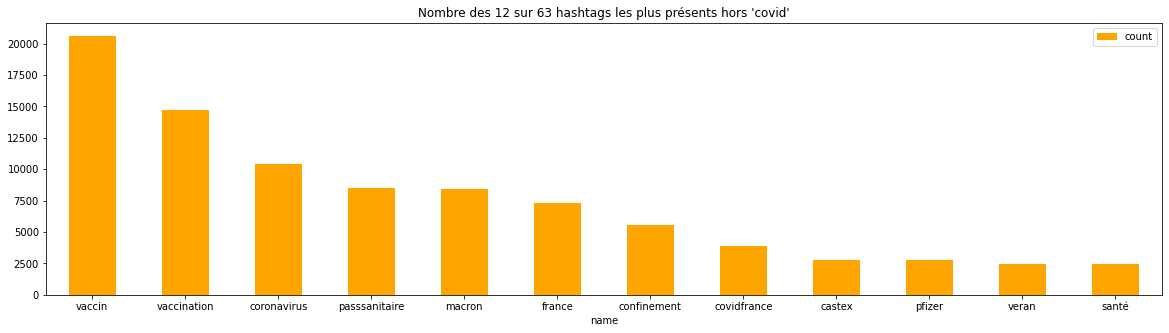

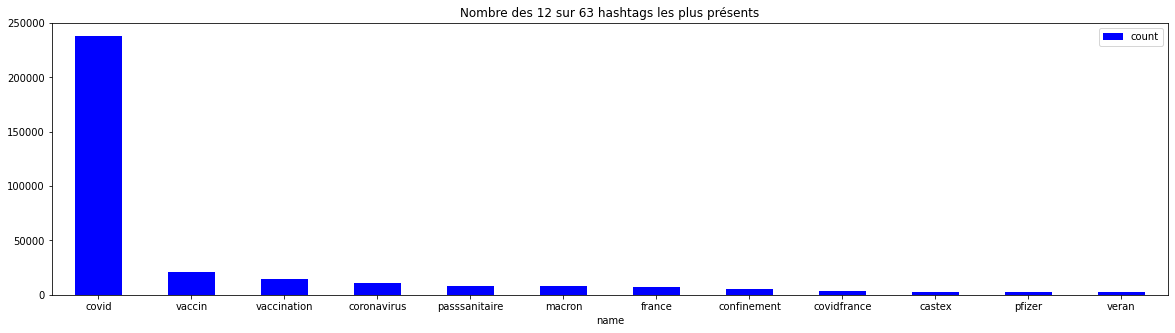

In [183]:
# visualisation des #
p = df_total_hashtag[1:].head(12)
c = df_total_hashtag.head(12)
p.plot.bar(x='name', y='count', rot=0, figsize=(20, 5), title="Nombre des 12 sur 63 hashtags les plus présents hors 'covid'", color='orange')
c.plot.bar(x='name', y='count', rot=0, figsize=(20, 5), title="Nombre des 12 sur 63 hashtags les plus présents", color='blue')

#### **<span style="color:#8EA3EB">4.5 Analyse des retweet</span>**

##### **<span style="color:#6DEFA2">4.5.1. Cleaning des retweets</span>**

In [160]:
# création de liste pour récupérer les tweets
tweets_rt = []

# création d'une boucle for pour analyser les tweets
# paramètres (mots clef, date, langue etc)
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('#covid since:2021-01-01 until:2021-12-30 lang:fr').get_items()):
    if i>1000000:
        break

    tweets_rt.append([tweet.date, tweet.id, tweet.content, tweet.retweetCount, tweet.retweetedTweet])

C:\Users\Bastien\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [161]:
# création de la liste de colonne
cols_name = ['Datetime', 'Tweet Id', 'Text', 'Nombre_retweet', 'Retweeté']

# création des DataFrame finaux
df_tweets_rt = pd.DataFrame(tweets_rt, columns=cols_name)

C:\Users\Bastien\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [162]:
# passage du nombre de retweet en int
df_tweets_rt['Nombre_retweet'] = df_tweets_rt['Nombre_retweet'].astype(int)

# création d'une nouvelle colonne pour classer les retweet ou non
for i in range(len(df_tweets_rt['Text'])):
    if df_tweets_rt['Nombre_retweet'][i] > 0:
        df_tweets_rt['Retweeté'][i] = "oui"
    else:
        df_tweets_rt['Retweeté'][i] = "non"

C:\Users\Bastien\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-162-5ad5dd4e9c90>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweets_rt['Retweeté'][i] = "non"
<ipython-input-162-5ad5dd4e9c90>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweets_rt['Retweeté'][i] = "oui"


##### **<span style="color:#6DEFA2">4.5.2. Fréquences des retweets</span>**

In [163]:
# encodage pour compter les retweets
encodage = pd.get_dummies(df_tweets_rt['Retweeté'])

# filtre pour tirer la moyenne des retweetq
df_moy_rt = df_tweets_rt[(df_tweets_rt['Nombre_retweet'].astype(int)) > 0.1]

C:\Users\Bastien\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [164]:
print(r'% de tweet non retweeté = ', round(encodage['non'].sum() / len(encodage) * 100,2), "%")
print(r'% de tweet non retweeté = ', round(encodage['oui'].sum() / len(encodage) * 100,2), "%")
print(r'moyenne de retweets pour un tweet retweeté = ', round((df_moy_rt['Nombre_retweet']).mean(),2))
print(r'mediane de retweets pour un tweet retweeté = ', round((df_moy_rt['Nombre_retweet']).median(),2))

% de tweet non retweeté =  62.95 %
% de tweet non retweeté =  37.05 %
moyenne de retweets pour un tweet retweeté =  14.1
mediane de retweets pour un tweet retweeté =  2.0


C:\Users\Bastien\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\Bastien\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:ylabel='Retweeté'>

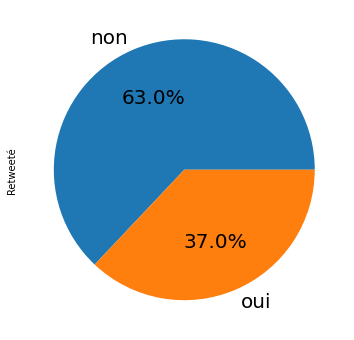

In [165]:
# graphique du nombre de tweet retweeté ou non
df_tweets_rt["Retweeté"].value_counts().plot.pie(figsize=(12, 6), autopct='%1.1f%%', fontsize=20)